## 이번 주 목표(얼룩말 책 5장_흐림효과)                         
--- 

### 흐림 효과          
1. 커널과 고정점       
2. 테두리 외삽법        
3. 단순 흐림 효과         
4. 박스 필터 흐림 효과               
5. 중간값 흐림 효과          
6. 가우시안 흐림 효과           
7. 양방향 필터 흐림 효과           

### 필터링        
1. 영상의 필터링        
2. 샤프닝     
3. 잡음 제거 필터링

# A. 흐림 효과         

- 흐림 효과는 __블러링(Blurring) 또는 스무딩(Smoothing)이라고 불리며, 노이즈를 줄이거나 외부 영향을 최소화하는데 사용된다.__    
- 흐림 효과는 노이즈를 제거해 연산 시 계산을 빠르고 정확하게 수행하는 데 도움이 된다.        
- 이미지의 해상도를 변경할 때 존재하지 않는 데이터를 생성하거나(확대) 존재하는 데이터를 줄여(축소) 샘플링된 이미지를 재구성할 때 사용된다.

1. 흐림 효과는 영상이나 이미지를 번지게 하여, 해당 픽셀을 주변 값들과 비교한다.      
2. 픽셀 색상을 재조정한다.      
3. __크게 다섯가지 종류가 있으며, 세 가지의 중요 매개변수가 있다.__            


## 세 가지 중요 매개변수 

### 1. 커널과 고정점

- 커널은 이미지에서 $(x,y)$의 픽셀과 해당 픽셀을 포함한 작은 크기의 공간을 말한다.          
- 이 "커널"에 특정 수식이나 함수를 적용해 새로운 이미지를 얻게 된다.             
- __커널은 필터라고 불리기도 한다.__          

__새로운 픽셀을 만들어내기 위해 커널 크기의 화소 값을 어떤 시스템을 통과하도록 하여 계산하는 것을 컨볼루션(Convolution)이라 한다.__   
- 컨볼루션의 예로    

1. 블러링(Blurring) : 이미지를 흐리게 만듦           
2. 샤프닝(Sharpening) : 이미지의 윤곽을 선명하게 만듦         
3. 미분(Gradient, Laplacian) : 이미지 명도의 변화량을 구함          

등이 있다.      

- __고정점은 커널을 통해 컨볼루션된 값을 할당한 지점이다.__        
- 커널 내에서 고정점은 하나의 지점을 가지며, 이미지가 어떻게 정렬되는지를 나타낸다.          

![7.kernelandanchor](./PostingPic/7.kernelandanchor.png)

- 위의 그림의 경우, -4의 고정점을 갖는 3*3 크기의 행렬이다.

- 커널로 전 영역에 걸쳐 연산을 수행하며, __3*3 크기의 사각형을 기준으로 고정점 위치의 픽셀값을 재조정__한다.      
- 이 때 연산을 수행하는 방법은 __커널의 종류(소벨, 가우시안 등)에 따라 달라진다.__       
- 커널을 사용하는 알고리즘이 모든 픽셀에 대해 연산을 수행하며, 최종적으로 모든 픽셀의 값이 변한다.       
- 이 때, 커널은 주로 __홀수의 값을 갖는 크기를 활용한다.__      

### 이 때, 테두리 부분의 처리에 문제가 발생한다. (0,0을 재조정할 때 (-1,-1 위치의 픽셀은..?))              

이를 고치기 위해 __테두리 외삽법을 사용한다.__     

### 2. 테두리 외삽법

- 컨볼루션을 적용할 때 이미지의 가장자리는 계산이 불가하다.       
- 이 문제를 해결하기 위해 __테두리의 이미지 바깥에 가상의 픽셀을 만들어 처리한다.__       

#### 이 때 수행할 수 있는 방법의 종류      

1. 가상 픽셀의 값을 0으로 할당     
2. 커널이 연산 가능한 부분부터 연산을 수행        
3. 이미지의 시작과 끝을 연결해 폐곡선을 형성해서 이미지의 테두리 부분을 대신하게 함

> Q1. 표 5.8(테두리 유형)을 정독해보세요.

- 고정 값으로 픽셀을 확장, 테두리 픽셀을 복사해서 확장, 픽셀을 반사해서 확장, 반대쪽 픽셀을 복사해서 확장, 이중 픽셀을 만들지 않고 반사해서 확장, reflect1010, 픽셀 투명한 확장, roi 밖은 신경 안 씀!

## 흐림 효과         

- 이제 이미지를 흐림 처리 하는 방법에 대해 알아봅시다.

### 1. 단순 흐림 효과         

> Q2. 단순 흐림 효과 함수를 적어보고, 설명해주세요. 하나의 이미지를 불러와 흐림 효과를 적용하여 출력해보세요.

> dst = cv2.blur(src, ksize, anchor, borderType)

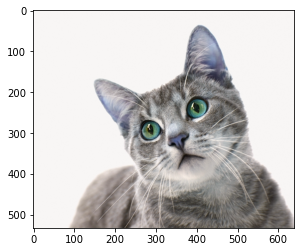

In [1]:
import cv2
import os
import matplotlib.pyplot as plt

image_path = './PostingPic/cat.jpg'
image = cv2.imread(image_path)

plt.imshow(image)

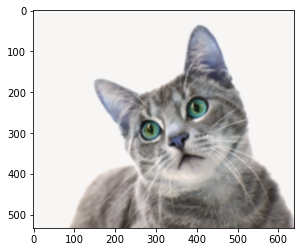

In [6]:
dst = cv2.blur(image, (5,5)) 

plt.imshow(dst)

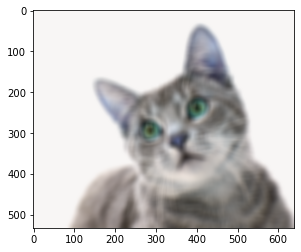

In [7]:
dst2 = cv2.blur(image, (16,16)) 

plt.imshow(dst2)

### 2. 박스 필터 흐림 효과

- 박스 필터 함수의 경우, 커널의 내부 값이 일반적으로 모두 같으며, 그 값은 1의 값을 갖는다.     
- 하지만 normalizae의 값을 True로 설정할 경우 정규화된 박스 필터로 변경되며 커널의 모든 값이 커널의 개수만큼 나눠진다. (일반적으로 커널의 값이 모두 1일 때,커널의 개수가 3*3이라면 $ {1 \over 9} * 1$의 값이 필터 값이 된다.)

> Q3. 박스 필터 흐림 효과 함수를 읽어보고, 이미지에 박스 필터 흐림을 적용해보세요. 

> cv2.BoxFilter(src, ddepth, ksize, anchor, normalize, borderType)       

__커널 내부 값이 모두 같다__

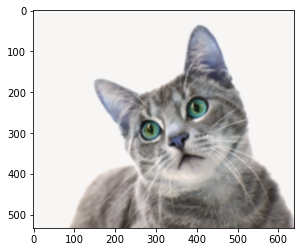

In [10]:
box_image1 = cv2.boxFilter(image, -1, (5,5)) 

plt.imshow(box_image1)

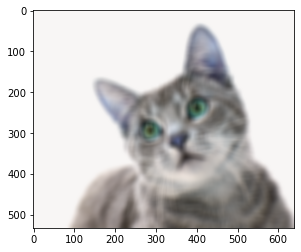

In [11]:
box_image1 = cv2.boxFilter(image, -1, (16,16)) 

plt.imshow(box_image1)

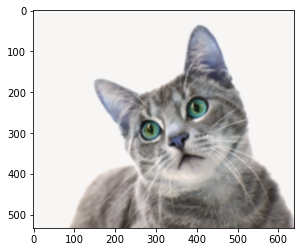

In [12]:
box_image3 = cv2.boxFilter(image, cv2.CV_8U, (5,5)) 

plt.imshow(box_image3)

### 3. 중간값 흐림 효과               

- 중간값 흐림 효과 함수는 고정점을 사용하지 않고, 중심 픽셀 주변으로 사각형 크기의 이웃한 픽셀의 중간값(평균 아님!)을 사용해 각 픽셀의 값을 변경한다.     
- 즉, 고정점이 항상 커널의 중심에 있다고 가정한다.          
- 중간값을 선택하기 위해서는 정사각형 형태의 커널에서 항상 중간에 있는 값을 선택해야 하므로 __ksize는 홀수만 가능하다.__ 

> Q4. 중간값 흐림 효과 함수를 읽어보고, 이미지에 중간값 흐림을 적용해보세요.(커널은 항상 홀수인 것 잊지 마세요!)

> dst = cv2.medianBlur(src, ksize)

In [16]:
median1 = cv2.medianBlur(image, (3,3)) 

plt.imshow(median1)

error: OpenCV(4.5.2) :-1: error: (-5:Bad argument) in function 'medianBlur'
> Overload resolution failed:
>  - Argument 'ksize' is required to be an integer
>  - Argument 'ksize' is required to be an integer


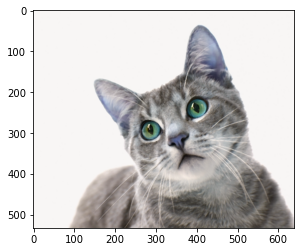

In [14]:
median1 = cv2.medianBlur(image, ksize=3) 

plt.imshow(median1)

In [15]:
median1 = cv2.medianBlur(image, ksize=16) 

plt.imshow(median1)

error: OpenCV(4.5.2) /tmp/pip-req-build-yw7uvgqm/opencv/modules/imgproc/src/median_blur.dispatch.cpp:285: error: (-215:Assertion failed) (ksize % 2 == 1) && (_src0.dims() <= 2 ) in function 'medianBlur'


### 4. 양방향 필터 흐림 효과

- 양방향 필터 흐림 효과는 가장자리를 선명히 보존하면서 노이즈를 우수하게 제거하는 흐림 효과 함수이다.     
- 양방향 필터는 두 종류의 가우시안 필터를 사용하여 흐림 효과를 적용한다. 
- 양방향 필터 흐림 효과는 다른 흐림 효과 함수에 비해 느리다.(지름이 클수록 수채화처럼 변형된다.)

> Q5. 양방향 필터 함수를 적어보고, 각 옵션을 설명해주세요.

> dst = cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace, dst, borderType)

> Q6. 이미지를 불러와 예제 5.14(python opencv에서의 양방향 필터 흐림 효과 함수)를 적용해보세요.

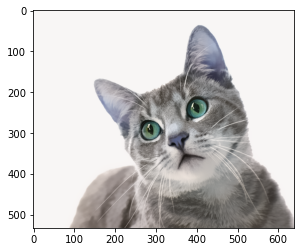

In [17]:
bia = cv2.bilateralFilter(image, 100,33,11,borderType=cv2.BORDER_ISOLATED) 

plt.imshow(bia)

- 얘는 이상하게 수행시간이 조금 걸린다이

# B. 필터링                 

[책이 없으신 분은 여기를 참고해주세요. 아래의 목차를 누르면 내용을 확인할 수 있습니다.](https://thebook.io/006939/)

### 1. 영상의 필터링

- "필터" 라는 말은, 무언가를 걸러 내고 일부를 통과시키는 장치를 의미한다.       
- __영상처리에서 필터링이란 영상에서 원하는 정보만 통과시키고 원치않은 정보는 걸러 내는 작업이다.__           
- 예를 들어, 영상에서 noise(잡음)를 걸러내어 영상을 깔끔하게 만들 수 있고, 영상에서 부드러운 성분을 제거하여 날카로운 느낌이 나도록 만들 수 있다.

#### 1. 마스크     
- 영상의 필터링은 마스크라고 부르는 작은 크기의 행렬을 이용한다.          
- 마스크는 필터링의 성격을 정의하는 행렬이며, 커널, 윈도우라는 이름으로 부르기도 한다.       
- 마스크는 다양한 크기와 모양으로 정의할 수 있으며, 필터링 연산의 결과는 결국 마스크 행렬의 모양과 원소 값에 의해 결정된다.

![다양한 마스크 모양](./PostingPic/7_필터마스크.jpg)

#### 2. 마스크를 이용한 필터링 연산 방법

![필터링 연산](./PostingPic/7_필터단계.jpg)

- $m$ 은 마스크 행렬을 나타낸다.     
- $f$ 와 $g$는 각각 입력 영상, 출력 영상을 나타낸다.        

- 마스크를 이용한 필터링은 __모든 입력 영상의 픽셀 위로 마스크 행렬을 이동시키면서 마스크 연산을 수행하는 방식으로 이루어진다.__   
- 마스크 연산이란 : 마스크 행렬의 모든 원소에 대하여 마스크 행렬 원소 값과 같은 위치에 있는 입력 영상의 픽셀 값을 서로 곱한 후, 그 결과를 모두 더하는 연산이다.

![결과](./PostingPic/7_결과.jpg)

- 외부 픽셀에 대해서는 __테두리 외삽법을 적용한다.__

### 2. 샤프닝

- 샤프닝은 초점이 잘 맞은 사진처럼 사물의 윤곽이 뚜렷하고 선명한 느낌이 나도록 영상을 변경하는 필터링 기법이다.        


#### 언샤프 마스크 필터      

- 이미 촬영된 사진을 초점이 잘 맞는 사진처럼 보이게 하려면 영상 에지 근방에서 픽셀 값의 명암비가 커지도록 해야 한다.     
- 샤프닝 영상을 만들기 위해서는 블러링된 영상을 사용하여야 한다.이처럼, __언샤프한 영상을 사용하여 역으로 날카로운 영상을 생성하는 필터를 언샤프 마스크 필터__ 라고 한다.

![샤프닝단계](./PostingPic/7_샤프닝단계.jpg)

- (a) : 영상의 모습. 영상의 엣지 부근에서 픽셀값이 증가하는 모양을 나타낸다.       
- (b) : $f(x,y)$에 블러링을 적용한 모습(삐쭉한 값을 부드럽게 증가하도록 수정한 모양이다.)      
- (c) : 원본 값에서 수정한 값을 빼서, 차이를 드러나도록 한 것이다.        
- (d) : 원본에 (c)를 더해서 차이가 더 두드러지도록 한 것이다. 

> Q7. 아래의 소스코드를 참고하여, 특정 이미지에 언샤프 마스크를 적용해보세요.        

- opencv는 언샤프 마스크 필터를 따로 제공하지는 않으니 소스코드를 참고해야 한다.

In [ ]:
import sys
import numpy as np
import cv2


src = cv2.imread('rose.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

cv2.imshow('src', src)

for sigma in range(1, 6):
    blurred = cv2.GaussianBlur(src, (0, 0), sigma)

    alpha = 1.0
    dst = cv2.addWeighted(src, 1 + alpha, blurred, -alpha, 0.0)

    desc = "sigma: %d" % sigma
    cv2.putText(dst, desc, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
               1.0, 255, 1, cv2.LINE_AA)

    cv2.imshow('dst', dst)
    cv2.waitKey()

cv2.destroyAllWindows()

### 3. 잡음 제거 필터링

- 영상을 획득하는 과정에서는 항상 잡음이 포함될 수 있으므로, 전처리 과정으로 잡음 제거 필터를 사용해야 한다.      
- 디지털 카메라에서 카메라 렌즈가 바라보는 장면을 원본 신호($s(x,y)$) 라고 하고, 추가되는 잡음을 ($m(x,y)$)이라고 하면   
- 실제 카메라에서 획득되는 영상 신호는 다음과 같이 표현할 수 있다.

> $f(x,y)  = s(x,y) + m(x,y)$

- 잡음이 생성되는 방식을 잡음 모델(noise model)이라고 한다.     
- 다양한 잡음 모델 중에서 가장 대표적인 잡음 모델은 가우시안 잡음 모델이다.     

![가우시안](./PostingPic/7_가우시안모델.jpg)

### 이걸 적용한 커널이란

![가우시안 커널](./PostingPic/가우시안커널.png)

- (평균이 0이고, 표준편차가 10인 가우시안 분포 그래프)

- 입력 영상에서 픽셀 값이 크게 변하지 않은 평탄한 영역에 가우시안 필터를 적용할 경우, 주변 픽셀 값이 부드럽게 블러링되며 잡음의 영향도 크게 줄어든다.    
- 그러나, 픽셀 값이 급격히 변경되는 엣지 영역에 가우시안 필터를 적용할 경우, 엣지 성분까지 함께 감소한다.        
- 따라서 잡음이 줄면서 엣지도 함께 무뎌지기 때문에 객체의 윤곽이 흐릿하게 바뀐다.

#### 양방향 필터

- 위에서 살펴본 "양방향 필터" 와 동일하다.           
- 양방향 필터의 작동 방식          

목적 : 엣지는 그대로 유지하면서 가우시안 잡음을 효과적으로 적용한다.    

![양방향 필터링](./PostingPic/7_양방향필터링수식.jpg)

- $f$ : 입력영상       
- $g$ : 출력영상      
- $p, q$ : 픽셀의 좌효     

- $G_{\sigma_s}$, $G_{\sigma_r}$ : 각각 표준 편차가 $\sigma_s$, $\sigma_r$인 가우시안 분포 함수

![가우시안 공식1](./PostingPic/7_가우시안공식1.png)

- 두 점 사이의 거리에 대한 가우시안 함수(가우시안 필터와 동작 방식이 같다) 

![가우시안공식2](./PostingPic/7_가우시안공식2.png)

- 두 점 사이의 픽셀 값 차이에 의한 가우시안 함수       
- 두 점의 픽셀 밝기 차이가 적다면 -> 큰 가중치를 가짐   
- 두 점의 픽셀 밝기 차이가 크다면 -> 적은 가중치를 가짐, 위의 공식 값은 0에 가까워지므로 에지 근방에서 가우시안 블러링 효과가 0에 가까워짐    

> Q8. 아래의 소스코드를 참고하여 가우시안 노이즈, 양방향 필터를 적용한 이미지를 출력해주세요.

In [ ]:
import numpy as np
import cv2
import random


def noise_gaussian():
    src = cv2.imread('lenna.bmp', cv2.IMREAD_GRAYSCALE)

    if src is None:
        print('Image load failed!').
        return

    cv2.imshow('src', src)

    for stddev in [10, 20, 30]:
        noise = np.zeros(src.shape, np.int32)
        cv2.randn(noise, 0, stddev)

        dst = cv2.add(src, noise, dtype=cv2.CV_8UC1)

        desc = 'stddev = %d' % stddev
        cv2.putText(dst, desc, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
                   1.0, 255, 1, cv2.LINE_AA)
        cv2.imshow('dst', dst)
        cv2.waitKey()

    cv2.destroyAllWindows()


def filter_bilateral():
    src = cv2.imread('lenna.bmp', cv2.IMREAD_GRAYSCALE)

    if src is None:
        print('Image load failed!')
        return

    noise = np.zeros(src.shape, np.int32)
    cv2.randn(noise, 0, 5)
    cv2.add(src, noise, src, dtype=cv2.CV_8UC1)

    dst1 = cv2.GaussianBlur(src, (0, 0), 5)
    dst2 = cv2.bilateralFilter(src, -1, 10, 5)
    
    cv2.imshow('src', src)
    cv2.imshow('dst1', dst1)
    cv2.imshow('dst2', dst2)
    cv2.waitKey()
    cv2.destroyAllWindows()

#### 미디언 필터

- 미디언 필터는 입력 영상에서 __자기 자신 픽셀과 주변 픽셀 값 중 중간값을 선택하여 결과 영상 픽셀 값으로 설정하는 필터링 기법이다.__  
- 미디언 필터는 특히 ___잡음 픽셀 값이 주변 픽셀 값과 큰 차이가 있는 경우 효과적으로 동작한다.(솔트앤페퍼 노이즈)___ 

![미디언필터](./PostingPic/7_미디언필터.jpg)

In [ ]:
def filter_median():
    src = cv2.imread('lenna.bmp', cv2.IMREAD_GRAYSCALE)

    if src is None:
        print('Image load failed!')
        return

    for i in range(0, int(src.size / 10)):
        x = random.randint(0, src.shape[1] - 1)
        y = random.randint(0, src.shape[0] - 1)
        src[x, y] = (i % 2) * 255

    #여기서도 위와 똑같이 cv2 함수를 사용하고 있군요!
    dst1 = cv2.GaussianBlur(src, (0, 0), 1)
    dst2 = cv2.medianBlur(src, 3)

    cv2.imshow('src', src)
    cv2.imshow('dst1', dst1)
    cv2.imshow('dst2', dst2)
    cv2.waitKey()
    cv2.destroyAllWindows()

> Q9. 위의 소스코드를 참고하여, 미디언 필터를 적용한 이미지를 출력해보세요. (위에서 했지만 한번 더 적용해볼까요 ㅎㅎ)

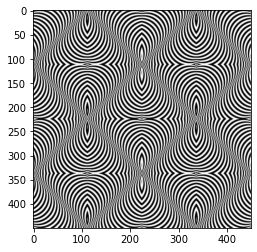

In [18]:
image_path = './PostingPic/test.jpg'
image = cv2.imread(image_path)

plt.imshow(image)

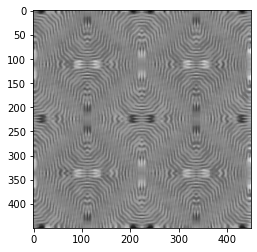

In [22]:
median1 = cv2.medianBlur(image, 17) 

plt.imshow(median1)